# **AIPI 590 - XAI | Assignment #1**
### Interpretable ML Assignment
### Lindsay Gross


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/18r50P2SgkHUKty02ZOacZssCm6J902fk)


👉 Make sure to delete the helper markdown below in your own notebook!

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

## **IF YOU PLAN ON RUNNING IN COLAB, RUN THIS TO GET THE DATA SET**

In [56]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [57]:
import os

# check if running in google colab
try:
    import google.colab
    IN_COLAB = True
    from google.colab import drive
except ImportError:
    IN_COLAB = False

repo_name = "Interpretable-ML"
git_path = "https://github.com/lindsaygross/Interpretable-ML.git"

if IN_COLAB:
    print("running in google colab...")

    # mount google drive
    drive.mount('/content/drive')

    # navigate to drive location
    drive_path = '/content/drive/MyDrive/Duke ME AIPI'
    os.makedirs(drive_path, exist_ok=True)
    %cd "{drive_path}"

    # clone or update repo
    if not os.path.exists(repo_name):
        !git clone {git_path}
    else:
        %cd {repo_name}
        !git pull origin main
        %cd ..

    %cd {repo_name}

    # install dependencies
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        !pip install pandas numpy matplotlib seaborn scikit-learn

    # verify csv file exists
    csv_file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
    if os.path.exists(csv_file):
        print(f"csv file found: {csv_file}")
    else:
        print("csv file not found")

else:
    # local setup
    if os.path.exists("requirements.txt"):
        !pip install -r requirements.txt
    else:
        print("requirements.txt not found")

## **Dependencies**

In [58]:
import numpy as np
import pandas as pd


# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

## **Exploratory Data Analysis**
**Context:**
This dataset includes information about various customers who left their job within the last month.


## **Explanation of the Content of Dataset**

**Each row represents a single customer, each column contains the following customer’s attributes** 
<br> 
<br>
**Each column contains customer’s attributes as follows:**

**customerID:** The individual customer
<br> 
<br>
**gender:** Whether the customer is a male or a female
<br>
<br>
**SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
<br>
<br>
**Partner:** Whether the customer has a partner or not (Yes, No)
<br>
<br>
**Dependents:** Whether the customer has dependents or not (Yes, No)
<br>
<br>
**Tenure:** Number of months the customer has stayed with the company
<br>
<br>
**PhoneService:** Whether the customer has a phone service or not (Yes, No
<br>
<br>
**MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
<br>
<br>
**InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
<br>
<br>
**OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
<br>
<br>
**OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)
<br>
<br>
**DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
<br>
<br>
**TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
<br>
<br>
**StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
<br>
<br>
**StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
<br>
<br>
**Contract:** The contract term of the customer (Month-to-month, One year, Two year)
<br>
<br>
**PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)
<br>
<br>
**PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
<br>
<br>
**MonthlyCharges:** The amount charged to the customer monthly
<br>
<br>
**TotalCharges:** The total amount charged to the customer
<br>
<br>
**Churn:** Whether the customer churned or not (Yes or No)
<br>
<br>


In [65]:
# Used claude at 4:45pm to help load data in colab and in local environment

"""
Perform an exploratory analysis of the dataset to understand the relationships between different
features and the target variable (churn). Use appropriate visualizations and statistical methods
to determine whether assumptions about linear, logistic, and GAM models are met.
"""
# load the data
try:
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print("loaded from local directory")
except:
    try:
        df = pd.read_csv('/content/drive/MyDrive/Duke ME AIPI/Interpretable-ML/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab repo")
    except:
        df = pd.read_csv('/content/drive/MyDrive/Explainable AI/WA_Fn-UseC_-Telco-Customer-Churn.csv')
        print("loaded from colab drive")

df.head()

# Convert 'TotalCharges' to numeric so that we can analyze the numeric effect on churn later on
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.info()




loaded from local directory
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7

In [66]:
# describe the data
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [67]:
# check for missing values
print(df.isnull().sum())    

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [69]:
# check for duplicate rows
duplicate_rows = df.duplicated()
df[duplicate_rows]
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


Churn
No     5174
Yes    1869
Name: count, dtype: int64


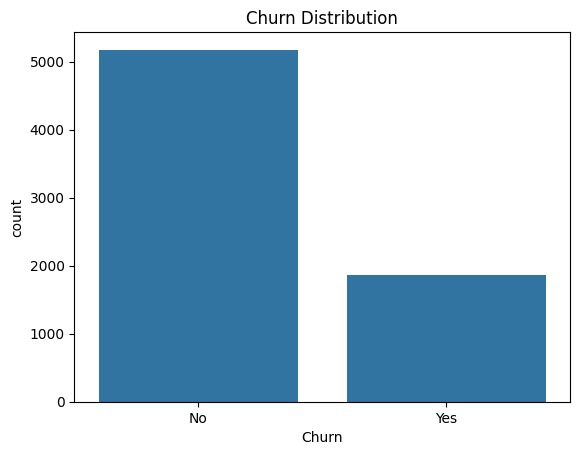

In [61]:
# Used claude at 4:50pm to help create binary column for churn

# visualize the churn distribution
print(df['Churn'].value_counts())
df['ChurnBinary'] = df['Churn'].map({'No': 0, 'Yes': 1}) # create a binary column for churn
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

### Churn Distribution
The target variable `Churn` is imbalanced: most customers stay, while a smaller amount leave.  
This imbalance is important because it can affect model performance, especially for **linear** and **logistic regression** models. 


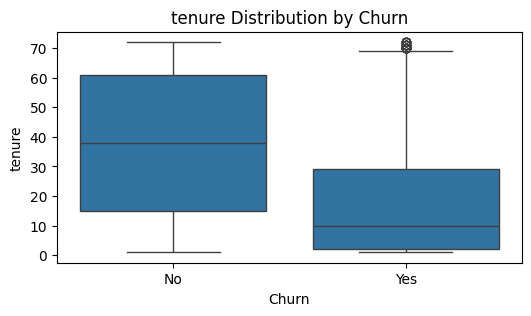

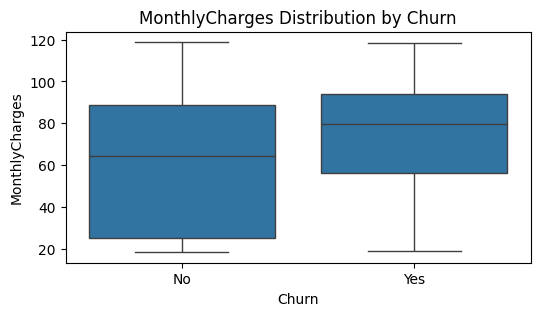

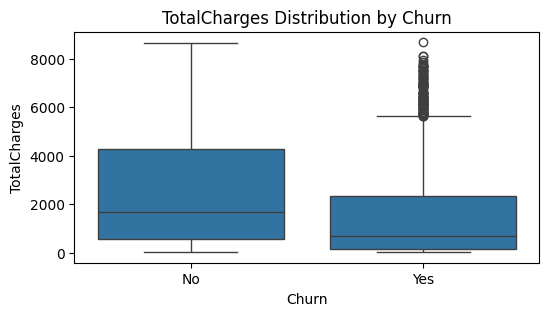

In [72]:
# Numerical features distribution vs Churn
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(6, 3))  # Used claude at 5:00pm to help adjust figure size
    sns.boxplot(x='Churn', y=feature, data=df) 
    plt.title(f'{feature} Distribution by Churn')
    plt.show()

## **EDA Numeric Features vs Churn**

**Tenure Distribution by Churn**

- Customers who churned generally have shorter tenure with the company.
- Most churned customers left within the first ~20 months.
- Non-churned customers are more spread out, with many staying long-term.

Tenure has a strong negative relationship with churn. This relationship looks non-linear (sharp drop in early months), which may not be well captured by linear regression, but logistic regression or a GAM can handle it better.

**Summary of above EDA**
---
<br>
- The above eda display a simple analysis of the dataframe calling the info function.

# Assumptions Explained

In [ ]:
# Check for assumptions of linearity

In [ ]:
# Check for assumptions of Independence of Observations

In [ ]:
# Check for assumptions of Homoscedasticity

In [ ]:
# Check for assumptions of Normality of Residuals

In [ ]:
# Check for assumptions of No Multicollinearity

In [ ]:
# Check for assumptions of No Influential Outliers

In [ ]:
# Coefficent Comparison Plot

In [ ]:
# Residual Plot

In [ ]:
# Actual vs Predicted Plot

In [ ]:
# Feature Importance Plot

In [ ]:
# Lasso Regualrization Plot

In [ ]:
# Linear Regression Model

In [ ]:
# Logistic Regression Model

In [ ]:
# GAM Model

# Discussion of Strengths and Weaknesses

# Recommendation of telecommunications model
Recommendations for which model(s) the telecommunications company should use to address their customer churn problem are provided and explained in markdown